<a href="https://colab.research.google.com/github/cherkashin-py/dap-2024/blob/main/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа №5. Визуализация данных**

**Задача 1.**
Постройте два линейных графика функции y = 2/x + 3 на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

*   Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
*   Первый график должен быть красного цвета и нарисован штрихпунктирной линией
*   Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линие

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Matplotlib version: 3.8.0


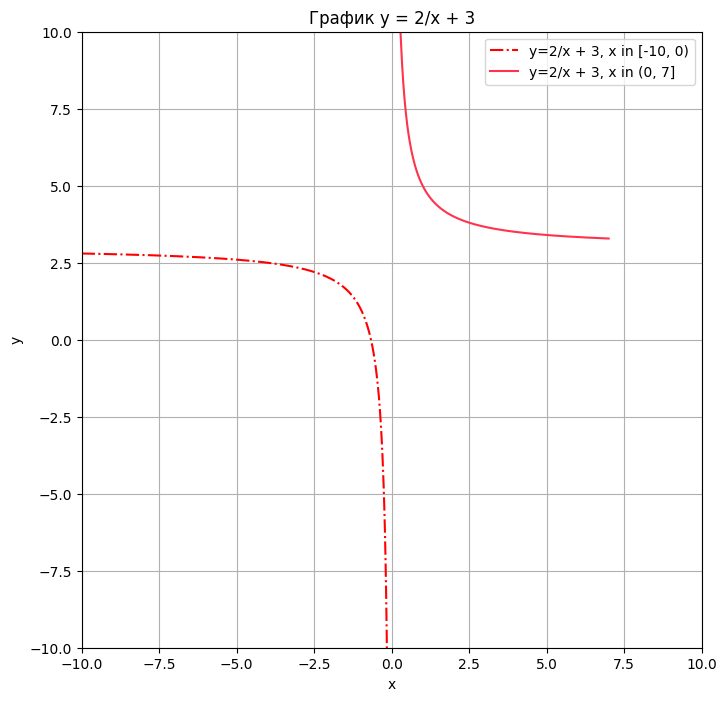

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

# Нахождение функции
def func(x):
    return 2 / x + 3

# Определение диапазонов
x1 = np.linspace(-10, -0.1, 500)
x2 = np.linspace(0.1, 7, 500)

# Вычисление значений y
y1 = func(x1)
y2 = func(x2)

# Построение графиков
plt.figure(figsize=(8, 8))
plt.plot(x1, y1, color='red', linestyle='-.', label="y=2/x + 3, x in [-10, 0)")
plt.plot(x2, y2, color=(1.0, 0.2, 0.3), linestyle='-', label="y=2/x + 3, x in (0, 7]")

# Пределы оси
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("График y = 2/x + 3")
plt.legend()
plt.grid(True)
plt.show()


**Задача 2.**
Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

*   По оси X - возврат пассажира (Age)
*   По оси Y - стоимость билета (Fare)
*   Для выживших пассажиров используется маркер зеленый круг (Survived)
*   Для не выживших пассажиров используется маркер красный крест (Survived)
*   График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

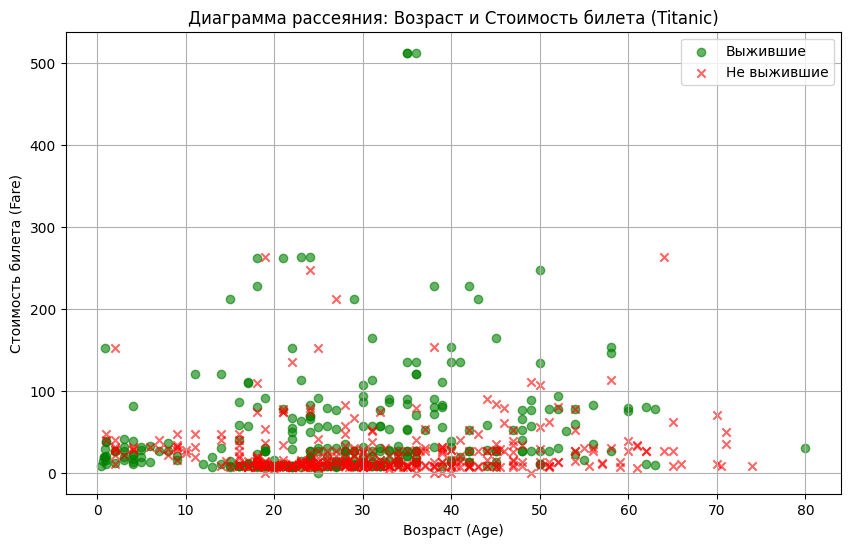

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'titanic.csv'
titanic_data = pd.read_csv(file_path)

# Удаление данных с отсутствующими значениями в Age и Fare
filtered_data = titanic_data.dropna(subset=['Age', 'Fare'])

# Разделение данных по выжившим
survived = filtered_data[filtered_data['Survived'] == 1]
not_survived = filtered_data[filtered_data['Survived'] == 0]

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(survived['Age'], survived['Fare'], c='green', label='Выжившие', marker='o', alpha=0.6)
plt.scatter(not_survived['Age'], not_survived['Fare'], c='red', label='Не выжившие', marker='x', alpha=0.6)

plt.xlabel('Возраст (Age)')
plt.ylabel('Стоимость билета (Fare)')
plt.title('Диаграмма рассеяния: Возраст и Стоимость билета (Titanic)')
plt.legend()
plt.grid(True)
plt.show()


**Задание 3.**
Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы. Для набора данных iris постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')


*   Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
*   Цвет маркеров должен зависеть от вида ирисов (iris.target)
*   Графики должны иметь подписи к осям, легенду и общий заголовок





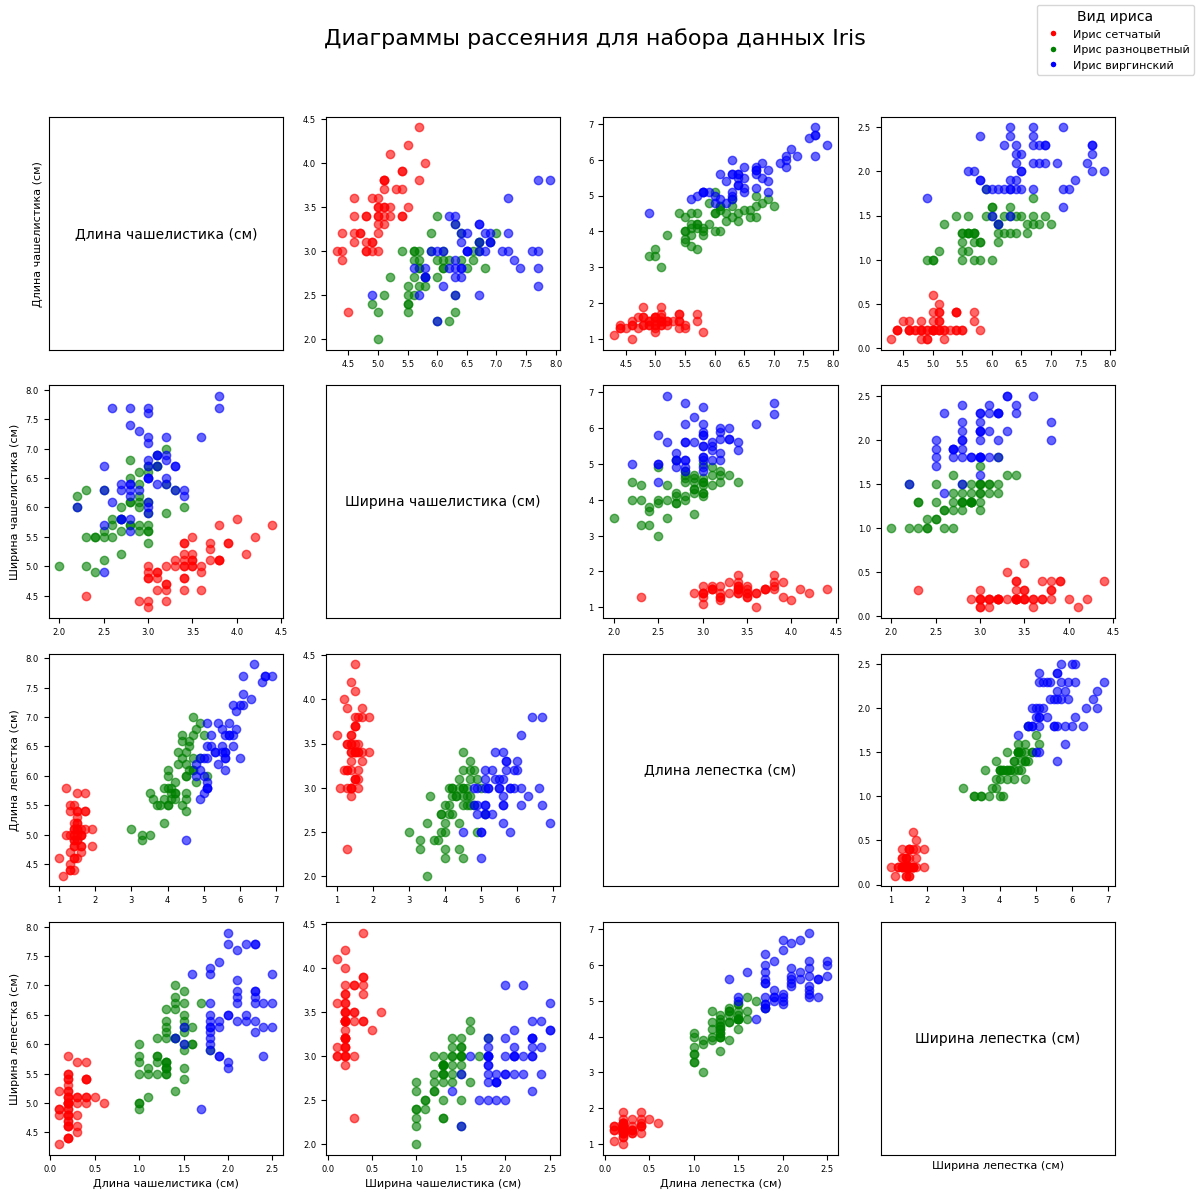

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Значения для построения графиков
features = {
    'sepal length (cm)': 'Длина чашелистика (см)',
    'sepal width (cm)': 'Ширина чашелистика (см)',
    'petal length (cm)': 'Длина лепестка (см)',
    'petal width (cm)': 'Ширина лепестка (см)'
}
num_features = len(features)

# Цвета для видов ирисов
colors = ['red', 'green', 'blue']
target_names = ['Ирис сетчатый', 'Ирис разноцветный', 'Ирис виргинский']

# Построение диаграмм рассеяния
fig, axes = plt.subplots(num_features, num_features, figsize=(12, 12))
fig.suptitle("Диаграммы рассеяния для набора данных Iris", fontsize=16)

for i, (feature_x, label_x) in enumerate(features.items()):
    for j, (feature_y, label_y) in enumerate(features.items()):
        ax = axes[i, j]
        if i == j:
            # Диагональные графики - текст
            ax.text(0.5, 0.5, label_x, ha='center', va='center', fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            for target, color in enumerate(colors):
                subset = data[data['target'] == target]
                ax.scatter(subset[feature_x], subset[feature_y], label=target_names[target], c=color, alpha=0.6)

        if j == 0:
            ax.set_ylabel(label_x, fontsize=8)
        if i == num_features - 1:
            ax.set_xlabel(label_y, fontsize=8)
        ax.tick_params(axis='both', which='major', labelsize=6)

# Настройка легенды
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5) for color in colors]
fig.legend(handles, target_names, loc='upper right', title='Вид ириса', fontsize=8)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()


**Задание 4.**
Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

*   Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
*   Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
*   График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

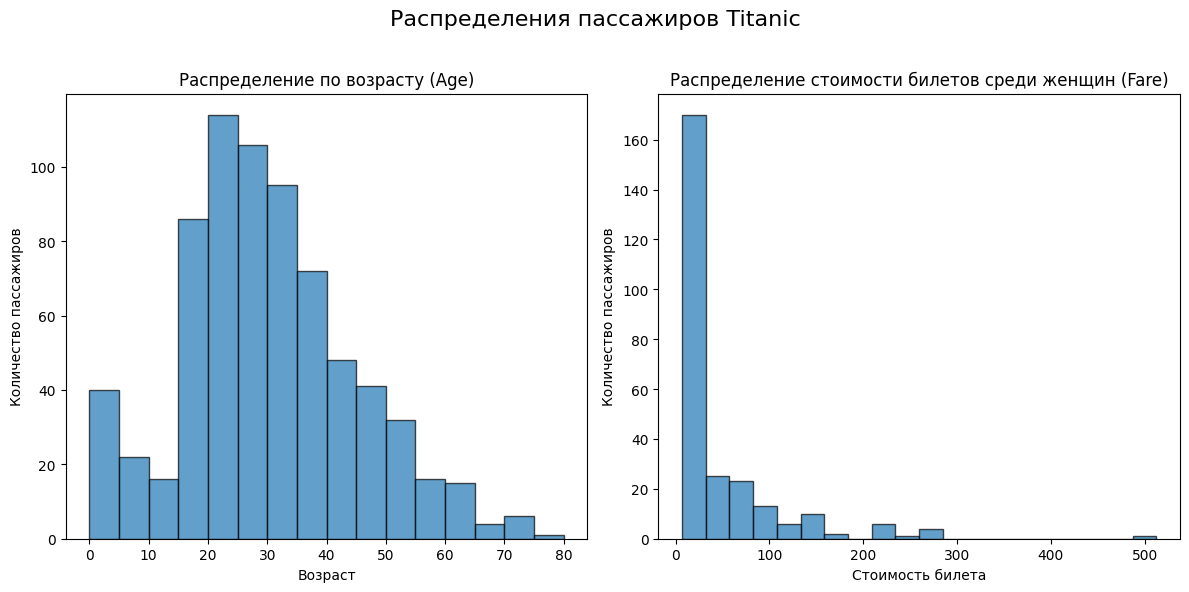

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('titanic.csv')

# Удаляем строки с пропущенными значениями в столбцах 'Age' и 'Fare'
titanic_data = titanic_data.dropna(subset=['Age', 'Fare'])

# Построение графиков на одном холсте
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 1. Гистограмма распределения пассажиров по возрасту (Age), интервал 5 лет
axes[0].hist(titanic_data['Age'], bins=range(0, 85, 5), edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение по возрасту (Age)')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество пассажиров')

# 2. Гистограмма распределения пассажиров женского пола по стоимости билетов (Fare)
female_passengers = titanic_data[titanic_data['Sex'] == 'female']
axes[1].hist(female_passengers['Fare'], bins=20, edgecolor='black', alpha=0.7)
axes[1].set_title('Распределение стоимости билетов среди женщин (Fare)')
axes[1].set_xlabel('Стоимость билета')
axes[1].set_ylabel('Количество пассажиров')

fig.suptitle('Распределения пассажиров Titanic', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Задание 5.**
Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

*   Диаграмма должна быть вертикальной
*   По оси X - класс каюты пассажира (Pclass)
*   По оси Y - средняя стоимость за проезд для данного класса (Fare)
*   График должен иметь подписи к осям, легенду и заголовок

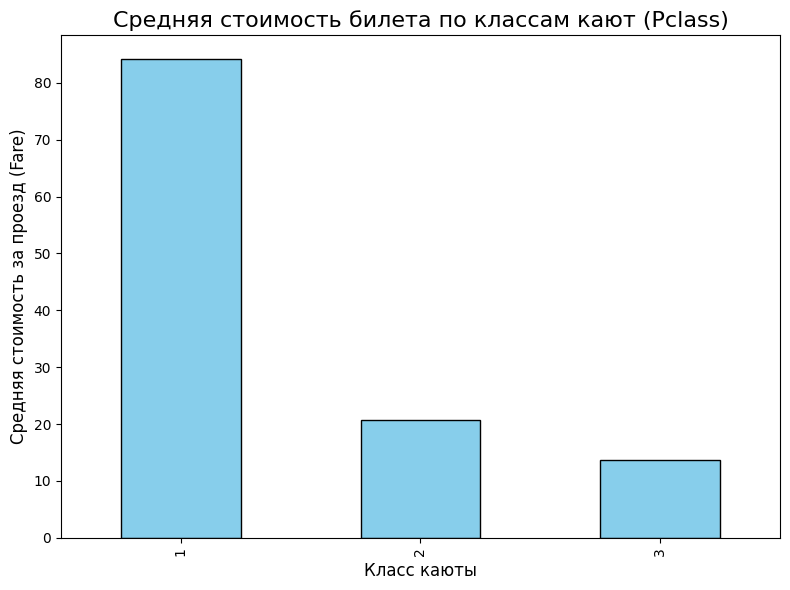

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('titanic.csv')

# Удаляем строки с пропущенными значениями в столбце 'Fare'
titanic_data = titanic_data.dropna(subset=['Fare'])

# Группировка данных по классу каюты (Pclass) и расчет средней стоимости билета (Fare) для каждого класса
average_fare_by_class = titanic_data.groupby('Pclass')['Fare'].mean()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))
average_fare_by_class.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Средняя стоимость билета по классам кают (Pclass)', fontsize=16)
plt.xlabel('Класс каюты', fontsize=12)
plt.ylabel('Средняя стоимость за проезд (Fare)', fontsize=12)

plt.tight_layout()
plt.show()

**Задание 6.**
Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

*   Диаграмма должна быть вертикальной
*   По оси X - класс каюты пассажира (Pclass)
*   По оси Y - количество пассажиров с разбивкой по полу (Sex)
*   График должен иметь подписи к осям, легенду и заголовок

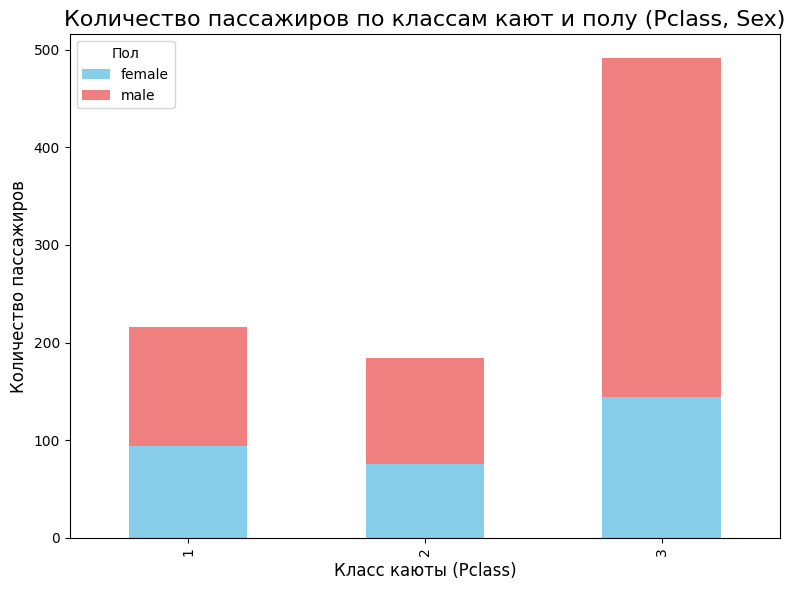

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('titanic.csv')

# Группировка данных по классу каюты (Pclass) и полу (Sex), подсчет количества пассажиров
gender_count_by_class = titanic_data.groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)

# Построение столбчатой диаграммы с накоплением
gender_count_by_class.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightcoral'])

plt.title('Количество пассажиров по классам кают и полу (Pclass, Sex)', fontsize=16)
plt.xlabel('Класс каюты (Pclass)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.legend(title='Пол', loc='upper left')
plt.tight_layout()
plt.show()

**Задание 7.**
Для набора данных iris постройте круговую диаграмму

*   Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
*   Сектор с максимальной долей долен быть выдвинут
*   График должен иметь подписи к осям, легенду и заголовок

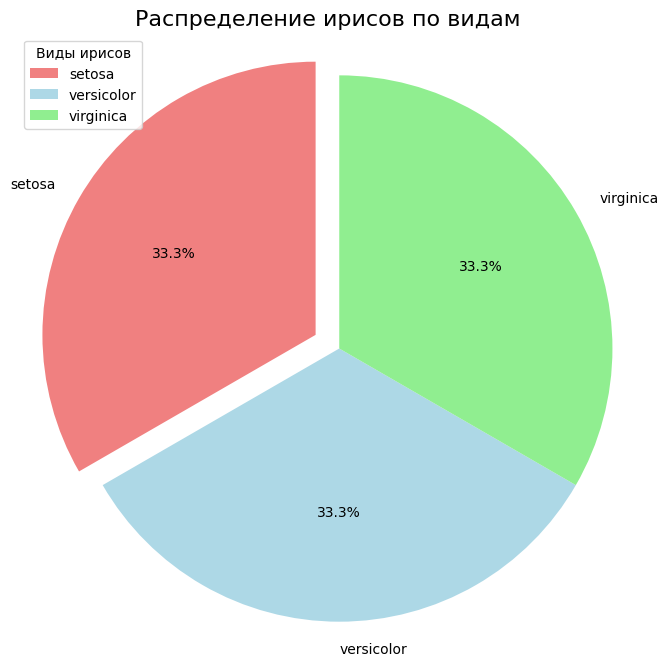

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

# Создание DataFrame из данных
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
species_names = [iris.target_names[i] for i in iris_df['species']]

# Подсчет количества ирисов каждого вида
species_counts = pd.Series(species_names).value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90,
        explode=[0.1 if i == species_counts.idxmax() else 0 for i in species_counts.index],
        colors=['lightcoral', 'lightblue', 'lightgreen'])

plt.title('Распределение ирисов по видам', fontsize=16)
plt.legend(species_counts.index, title="Виды ирисов", loc="upper left")
plt.axis('equal')
plt.show()

**Задание 8.**
Использую библиотеку Seaborn постройте гистограмму для возраста пассажиров "Титаника"

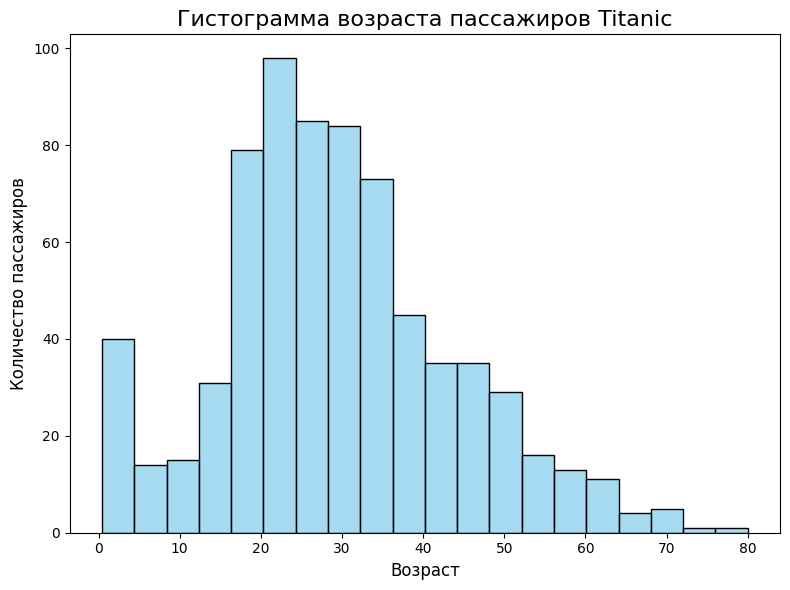

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('titanic.csv')

# Удаляем строки с пропущенными значениями в столбце 'Age'
titanic_data = titanic_data.dropna(subset=['Age'])

# Построение гистограммы для возраста пассажиров
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'], bins=20, kde=False, color='skyblue', edgecolor='black')

plt.title('Гистограмма возраста пассажиров Titanic', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.tight_layout()
plt.show()

**Вывод: Были приобретены навыки работы с визуализацией данных**